In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math

In [12]:
n = 100
teta = 5
eps = 0.025

In [29]:
x = np.random.uniform(teta,2*teta,n)
x = x.round(2)

 # Доверительные интервалы 

### Точный

In [30]:
b1_acc, b2_acc =  x.max()/(1 + (1-eps)**(1/n)), x.max()/(1+eps**(1/n))

In [31]:
b1_acc, b2_acc

(4.980630413415442, 5.071842683812156)

### Асиптотический ОММ

In [87]:
b1_as_omm, b2_as_omm = 2/3*x.mean() - 1.3*((x**2).mean() - x.mean()**2)**(0.5)/(n**0.5), 2/3*x.mean() + 1.3*((x**2).mean() - x.mean()**2)**(0.5)/(n**0.5)

In [88]:
b1_as_omm, b2_as_omm 

(4.700346709685375, 5.068186623647957)

### Асимптотический ОМП

In [35]:
b1_as_omp, b2_as_omp = 2/3*x.mean()*(1-1.96/(n**0.5)), 2/3*x.mean()*(1+1.96/(n**0.5))

In [36]:
b1_as_omp, b2_as_omp 

(3.9269504, 5.841582933333332)

### Bootstrap

In [63]:
delta = np.array([])
teta_ = 2/3*x.mean()
for i in range(0,1000):
    bootstrap = np.random.choice(x, size=x.shape[0]).round(2) 
    delta = np.append(delta, 2/3*bootstrap.mean() - teta_)

In [74]:
delta.sort() 
b1_b, b2_b = teta_ - delta[974], teta_ - delta[24]

In [75]:
b1_b, b2_b 

(4.676199999999998, 5.074266666666665)

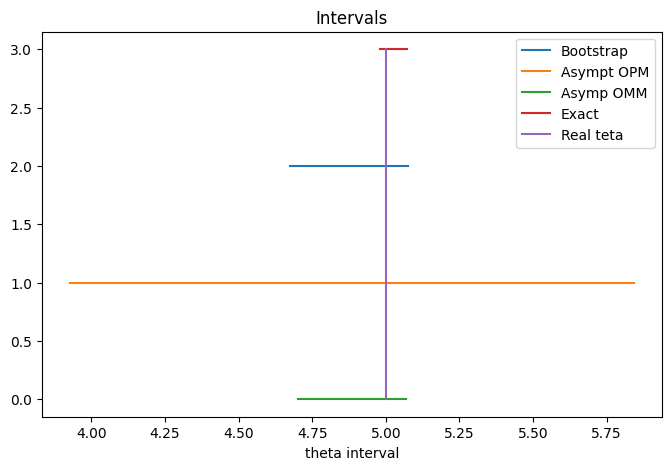

In [89]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([b1_b, b2_b], [2, 2], label = 'Bootstrap')
ax.plot([b1_as_omp, b2_as_omp], [1, 1], label = 'Asympt OPM')
ax.plot([b1_as_omm, b2_as_omm], [0, 0], label = 'Asymp OMM')
ax.plot([b1_acc, b2_acc], [3, 3], label = 'Exact')
ax.plot([teta, teta], [0,3], label = 'Real teta')

ax.set_title('Intervals')    

ax.set_xlabel('theta interval')

ax.legend(loc = 'best')